In [1]:
# Problem statement : House price prediction using linear algorithm.

In [2]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To avoid warning
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore

In [3]:
# Data Collection:

In [4]:
df=pd.read_csv("Pune_House_Data.csv")
df

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.00,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.00,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.00,Prabhat Road


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df1=df["price"]
df1

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13320, dtype: float64

In [9]:
#Exploratory Data Analysis:

# 1.area_type

In [10]:
df["area_type"].isna().sum()

0

In [11]:
df["area_type"].value_counts().to_dict()

{'Super built-up  Area': 8790,
 'Built-up  Area': 2418,
 'Plot  Area': 2025,
 'Carpet  Area': 87}

In [12]:
df["area_type"].replace({'Super built-up  Area':0,
 'Built-up  Area':1,
 'Plot  Area': 2,
 'Carpet  Area':3},inplace=True)

In [13]:
df["area_type"].dtype

dtype('int64')

# 2.availability

In [14]:
df["availability"].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [15]:
df["availability"].isna().sum()

0

In [16]:
df["availability"].dtype

dtype('O')

In [17]:
x=df["availability"].value_counts()
x.sort_values(ascending=True).to_dict()

{'14-Jul': 1,
 '15-Jun': 1,
 '16-Jul': 1,
 '14-Nov': 1,
 '15-Dec': 1,
 '16-Jan': 1,
 '15-Aug': 1,
 '17-Jan': 1,
 '16-Nov': 1,
 '16-Oct': 1,
 '20-Feb': 2,
 '15-Nov': 2,
 '17-Feb': 2,
 '15-Oct': 2,
 '16-Sep': 2,
 '22-Nov': 2,
 '20-Mar': 2,
 '16-Mar': 3,
 '21-Nov': 3,
 '19-Feb': 3,
 '22-Mar': 3,
 '16-Dec': 4,
 '20-May': 4,
 '20-Apr': 4,
 '20-Nov': 4,
 '17-Mar': 5,
 '20-Jul': 5,
 '21-Aug': 5,
 '21-Feb': 6,
 '20-Sep': 6,
 '21-Oct': 6,
 '21-Sep': 6,
 '22-Jan': 6,
 '17-Apr': 7,
 '19-Nov': 7,
 '20-Oct': 7,
 '17-May': 8,
 '21-Jul': 8,
 '17-Aug': 9,
 '19-May': 9,
 '22-May': 10,
 '20-Jun': 11,
 '17-Sep': 11,
 '22-Dec': 11,
 '21-Jan': 12,
 '17-Nov': 12,
 '17-Jul': 12,
 '21-May': 12,
 '17-Jun': 13,
 '21-Mar': 14,
 '19-Oct': 15,
 '19-Apr': 16,
 'Immediate Possession': 16,
 '20-Aug': 16,
 '21-Jun': 17,
 '19-Aug': 18,
 '22-Jun': 19,
 '19-Sep': 21,
 '17-Oct': 21,
 '20-Jan': 24,
 '17-Dec': 29,
 '19-Jul': 36,
 '18-Oct': 39,
 '19-Jan': 39,
 '19-Jun': 40,
 '18-Sep': 41,
 '18-Jan': 43,
 '18-Nov': 47,
 '18-F

In [18]:
df["availability"].replace({'Immediate Possession':'Ready To Move'},inplace=True)

In [19]:
df["availability"].replace({'Ready To Move':'1-Jan'},inplace=True)

In [20]:
df["availability"].value_counts().to_dict()

{'1-Jan': 10597,
 '18-Dec': 307,
 '18-May': 295,
 '18-Apr': 271,
 '18-Aug': 200,
 '19-Dec': 185,
 '18-Jul': 143,
 '18-Mar': 131,
 '18-Jun': 99,
 '20-Dec': 98,
 '21-Dec': 93,
 '19-Mar': 88,
 '18-Feb': 62,
 '18-Nov': 47,
 '18-Jan': 43,
 '18-Sep': 41,
 '19-Jun': 40,
 '18-Oct': 39,
 '19-Jan': 39,
 '19-Jul': 36,
 '17-Dec': 29,
 '20-Jan': 24,
 '17-Oct': 21,
 '19-Sep': 21,
 '22-Jun': 19,
 '19-Aug': 18,
 '21-Jun': 17,
 '19-Apr': 16,
 '20-Aug': 16,
 '19-Oct': 15,
 '21-Mar': 14,
 '17-Jun': 13,
 '21-May': 12,
 '17-Jul': 12,
 '17-Nov': 12,
 '21-Jan': 12,
 '20-Jun': 11,
 '17-Sep': 11,
 '22-Dec': 11,
 '22-May': 10,
 '17-Aug': 9,
 '19-May': 9,
 '21-Jul': 8,
 '17-May': 8,
 '19-Nov': 7,
 '17-Apr': 7,
 '20-Oct': 7,
 '21-Feb': 6,
 '21-Oct': 6,
 '22-Jan': 6,
 '20-Sep': 6,
 '21-Sep': 6,
 '20-Jul': 5,
 '17-Mar': 5,
 '21-Aug': 5,
 '20-May': 4,
 '16-Dec': 4,
 '20-Nov': 4,
 '20-Apr': 4,
 '22-Mar': 3,
 '21-Nov': 3,
 '16-Mar': 3,
 '19-Feb': 3,
 '22-Nov': 2,
 '15-Oct': 2,
 '16-Sep': 2,
 '15-Nov': 2,
 '17-Feb': 2,

In [21]:
df["availability"].replace({'1-Jan':0,
 '18-Dec':12,
 '18-May':5,
 '18-Apr':4,
 '18-Aug':8,
 '19-Dec':12,
 '18-Jul':7,
 '18-Mar':3,
 '18-Jun':6,
 '20-Dec':12,
 '21-Dec':12,
 '19-Mar':3,
 '18-Feb':2,
 '18-Nov':11,
 '18-Jan':1,
 '18-Sep':9,
 '19-Jun':6,
 '18-Oct':12,
 '19-Jan':1,
 '19-Jul':7,
 '17-Dec':12,
 '20-Jan':1,
 '17-Oct':10,
 '19-Sep':9,
 '22-Jun':6,
 '19-Aug':8,
 '21-Jun':6,
 '19-Apr':4,
 '20-Aug':8,
 '19-Oct':10,
 '21-Mar':3,
 '17-Jun':6,
 '21-May':5,
 '17-Jul':7,
 '17-Nov':11,
 '21-Jan':1,
 '20-Jun':6,
 '17-Sep':9,
 '22-Dec':12,
 '22-May':5,
 '17-Aug':8,
 '19-May':5,
 '21-Jul':7,
 '17-May':5,
 '19-Nov':11,
 '17-Apr':4,
 '20-Oct':10,
 '21-Feb':2,
 '21-Oct':10,
 '22-Jan':1,
 '20-Sep':9,
 '21-Sep':9,
 '20-Jul':7,
 '17-Mar':3,
 '21-Aug':8,
 '20-May':5,
 '16-Dec':12,
 '20-Nov':11,
 '20-Apr':4,
 '22-Mar':3,
 '21-Nov':11,
 '16-Mar':3,
 '19-Feb':2,
 '22-Nov':12,
 '15-Oct':10,
 '16-Sep':9,
 '15-Nov':12,
 '17-Feb':2,
 '20-Feb':2,
 '20-Mar':3,
 '15-Jun':6,
 '16-Jul':7,
 '14-Nov':11,
 '15-Dec':12,
 '16-Oct':10,
 '15-Aug':8,
 '17-Jan':1,
 '16-Nov':11,
 '16-Jan':1,
 '14-Jul':7},inplace=True)

In [22]:
availability_index=df["availability"].value_counts().to_dict()
availability_index

{0: 10597,
 12: 771,
 5: 338,
 4: 298,
 8: 249,
 3: 246,
 7: 206,
 6: 200,
 1: 126,
 9: 87,
 2: 75,
 11: 75,
 10: 52}

In [23]:
df["availability"].dtype

dtype('int64')

# 3.size 

In [24]:
df["size"].isna().sum()

16

In [25]:
df["size"].dtype

dtype('O')

In [26]:
df["size"].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [27]:
df.shape

(13320, 9)

In [28]:
df["size"].fillna(df["size"].mode()[0],inplace=True)

In [29]:
df["size"].isna().sum()

0

# 4.society 

In [30]:
df["society"].isna().sum()

5502

In [31]:
df["society"].dtype

dtype('O')

In [32]:
df["society"].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [33]:
df["society"].fillna(df["society"].mode()[0],inplace=True)

In [34]:
df["society"].isna().sum()

0

In [37]:
df["society"].value_counts()

GrrvaGr    5582
PrarePa      76
Sryalan      59
Prtates      59
GMown E      56
           ... 
Amionce       1
JaghtDe       1
Jauraht       1
Brity U       1
RSntsAp       1
Name: society, Length: 2688, dtype: int64

In [38]:
df.drop("society",axis=1,inplace=True)

# 5.total_sqft

In [36]:
df["total_sqft"].value_counts()

1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2117, dtype: int64

In [42]:
df["total_sqft"].isna().sum()

0

# 6.bath

In [55]:
df["bath"].value_counts()

2.0     6906
3.0     3284
4.0     1225
1.0      785
5.0      522
6.0      272
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [56]:
df["bath"].isna().sum()

69

In [57]:
df["bath"].dtype

dtype('float64')

In [58]:
df["bath"].fillna(df["bath"].median,inplace=True)

In [6]:
df["bath"].isna().sum()

73

 # price

In [7]:
df["price"].value_counts()

75.00     310
65.00     302
55.00     275
60.00     270
45.00     240
         ... 
351.00      1
54.10       1
80.64       1
32.73       1
488.00      1
Name: price, Length: 1994, dtype: int64

In [8]:
df["price"].isna().sum()

0

<Axes: xlabel='price'>

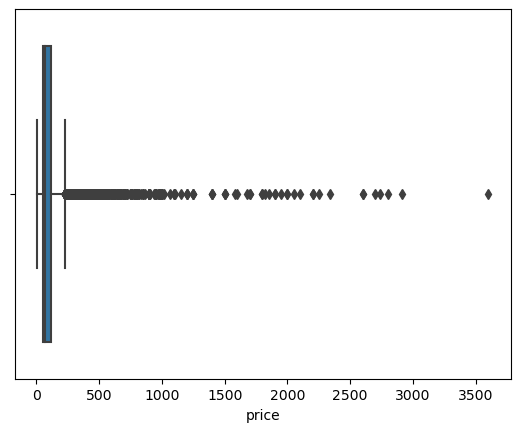

In [9]:
sns.boxplot(x=df["price"])

In [10]:
q1=df["price"].quantile(0.25)
q2=df["price"].quantile(0.50)
q3=df["price"].quantile(0.75)
iqr=q3-q1
upper_tail=q3+(1.5*iqr)
lower_tail=q1-(1.5*iqr)
print("upper_tail :",upper_tail)
print("lower_tail :",lower_tail)

upper_tail : 225.0
lower_tail : -55.0


In [247]:
df[["price"]].loc[df["price"]>upper_tail]

,price
1,1220.0
6,1220.0
7,1220.0
9,1220.0
11,1220.0
...,...
13306,1220.0
13311,1220.0
13315,1220.0
13316,1220.0


In [248]:
df[["price"]].loc[df["price"]<lower_tail]

,price


In [11]:
df["price"].dtype

dtype('float64')

# site_location

In [12]:
df["site_location"].value_counts()

Alandi Road            139
Kalyani Nagar          139
Mahatma Gandhi Road    139
Lulla Nagar            139
Laxmi Road             139
                      ... 
Sadashiv Peth          138
Raviwar Peth           138
Rasta Peth             138
Ghorpadi               138
other                    1
Name: site_location, Length: 97, dtype: int64

In [13]:
df["site_location"].isna().sum()

1

In [14]:
df["site_location"].fillna(df["site_location"].median,inplace=True)

In [15]:
df["site_location"].isna().sum()

0